# Summarize Course Reviews
## Motivation
* I want to address limitations of existing courses on text mining so that my students are benifited by what's really missing in the existing courses
* I want to leverage reviews of existing courses to decide on the most important desired features of a text mining course

Let's use our knowledge of text mining we have learned so far and the advances in text embeddings to analyze course review data.

## Background
You have learned that text mining is valuable to extract insights from un-structured text. You started out by keyword based text processing techniques, built a search index, a qury processor for boolean queries, and presented resutls for search queries. Further, you understood key ideas behind vector space model which provides a nice mathematical framework to represent documents and queries. We will now use more advanced representations called embeddings which is now state-of-the-art for processing text.

## Embeddings?
It's a fancy name for given to the document vectors we had in the vector space model. However, the key difference is that the embeddings are in the latent space compared to our document vectors which were not in the latent space.

## What does this mean?
* We had a fixed dimension for representing each document in our collection and the dimension == the vocabulary size. Each term in the vocabulary added one dimention to the representation space. So, there are no hidden or latent dimensions in this representation.
* This is going to change in the state-of-the-art embeddings -- we will define a latent space of embeddings e.g., say a 500 dimensional space which will be used to represent the documents in our collection. So, each document can now be represented using an embedding of 500 entries and we perform similarity checks for example on these embeddings if we want to comapre to documents.

# Dataset
We will now load the reviews dataset scrapped from html pages of the courses related to text mining. The data is already scraped using Beautiful Soup, a Python library to scrape web pages. You have the data in a csv file containing two columns <rating, comment>. Let's read the data.

In [1]:
import pandas as pd

In [53]:
reviews = pd.read_csv("course_reviews.csv")
reviews

rating                                            comment
0        4.5                                   So far, so good!
1        5.0  Very nice introduction to advanced text machin...
2        1.0  not good,total waste of money and time..not gi...
3        5.0  I was not satisfied abut the quality of instru...
4        3.5  I would name this course as "A High-level Summ...
...      ...                                                ...
1290     5.0                              Great course! Thanks!
1291     5.0                                      Great! thanks
1292     5.0                                     Great content!
1293     5.0                                           Perfect!
1294     5.0                                        Very great!

[1295 rows x 2 columns]

There are `1,294` reviews we have collected for courses related to text mining. As you can see some the reviews shown above are not that informative such as "Great! Thanks!". After glancing through the reviews, you may find that the negative reviews are much more insightful for us since I wanted to address the limitations of existing text mining courses. Let's quickly summarize the reviews by using word clouds.

We will be using `ReviewData` class that does the heavy-lifting of scraping reviews from html files. All you need to do is to pass the directory where we have stored all the html files containing reviews. You will have this directory if you have cloned the repo. Normally, it's good practice to have data files on separate storage such as AWS S3, goole drive, or Azure blob storage. Since it's convenient for you to just run this script without setting up storage access, I have checked in the data into the GitHub repository.

In [54]:
import reviews_data

In [55]:
review_data = reviews_data.ReviewData("../data/html_review_files")

  6%|█████████▉                                                                                                                                                     | 1/16 [00:00<00:03,  3.95it/s]

Total reviews: 17


 12%|███████████████████▉                                                                                                                                           | 2/16 [00:01<00:10,  1.38it/s]

Total reviews: 115


 19%|█████████████████████████████▊                                                                                                                                 | 3/16 [00:01<00:07,  1.78it/s]

Total reviews: 76


 25%|███████████████████████████████████████▊                                                                                                                       | 4/16 [00:01<00:05,  2.15it/s]

Total reviews: 25


 38%|███████████████████████████████████████████████████████████▋                                                                                                   | 6/16 [00:02<00:03,  2.96it/s]

Total reviews: 67
Total reviews: 5


 44%|█████████████████████████████████████████████████████████████████████▌                                                                                         | 7/16 [00:03<00:04,  1.93it/s]

Total reviews: 174


 50%|███████████████████████████████████████████████████████████████████████████████▌                                                                               | 8/16 [00:03<00:03,  2.32it/s]

Total reviews: 22


 56%|█████████████████████████████████████████████████████████████████████████████████████████▍                                                                     | 9/16 [00:04<00:03,  2.01it/s]

Total reviews: 200


 62%|██████████████████████████████████████████████████████████████████████████████████████████████████▊                                                           | 10/16 [00:04<00:02,  2.08it/s]

Total reviews: 14


 69%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                 | 11/16 [00:04<00:02,  2.43it/s]

Total reviews: 36


 75%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                       | 12/16 [00:05<00:01,  2.74it/s]

Total reviews: 5


 81%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍                             | 13/16 [00:05<00:01,  2.38it/s]

Total reviews: 135


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                   | 14/16 [00:06<00:01,  1.69it/s]

Total reviews: 273


 94%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏         | 15/16 [00:07<00:00,  1.95it/s]

Total reviews: 63


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:07<00:00,  2.15it/s]

Total reviews: 68


# 1. Wordcloud: Basic Summarization Technique

## Wordcloud for all words in the reviews

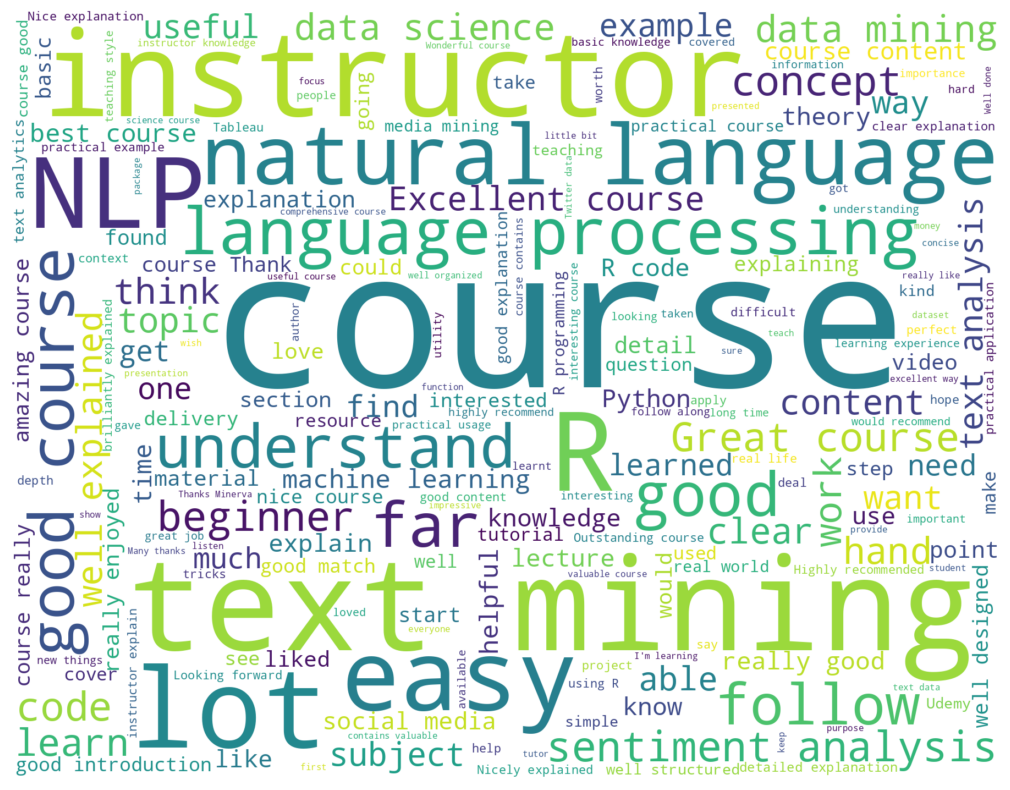

In [56]:
review_data.generate_word_cloud(
        " ".join(list(review_data.data["comment"].values)),
        out_file_name="all_words.png",
    )

## Wordcloud for all postive reviews
Reviews having a rating greater than `3` are considered positive for this analysis. You can change this by modifying the `ReviewData` if you like. Let's look at the word cloud for positive reviews. Note the following insights from the wordcloud:
* good explanation
* real world
* nice explanation
* depth
* well organized & structured
* practical usage

With the above aspects, I wanted to make a course with these features. Here is what I did for addressing each of these:
* good explanation: This course uses code as a way to explain without using slides. Slides are passive. Best way to learn is by doing! Hence, coding is central to this course.
* real-world: We deploy our solution as a webservice. This is crucial to make any real-world impact with your creations.
* nice explanation: I wanted to explain ideas as I implement in code, hope this helps in better understanding of ideas.
* depth: The focus of this course is to understand very minimal set of ideas related to text mining but do so throughly.
* well organized & structured: Separting the text mining basics from deployment ideas help make a clear separation and brings structure to the course.
* practical usage: This course walks you through the tools and techniques to package your solution and deploy it as a webservice. Further, this course is informed by text mining -- we are doing this analysis of reviews to gain insights and tap into the social signals of students who have taken text mining course.

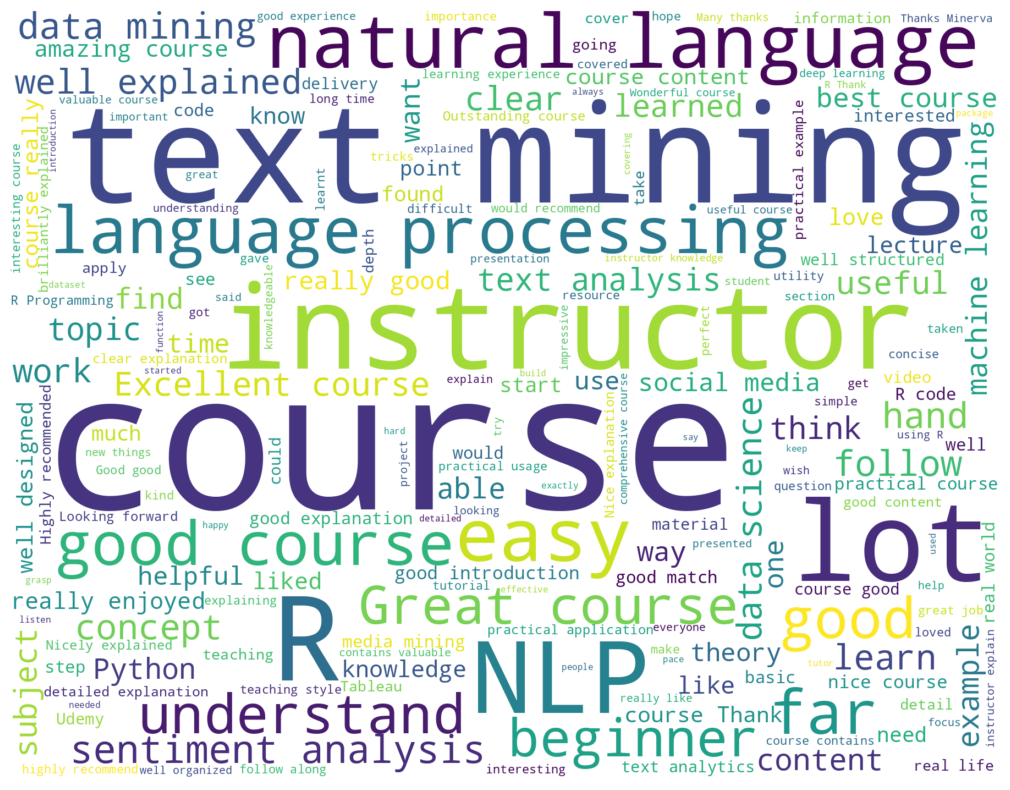

In [6]:
review_data.generate_word_cloud(
        " ".join(list(review_data.positive_review_data["comment"].values)),
        out_file_name="positive_words.png",
    )

## Wordcloud for all negative reviews
This is probably the most valuable part of analysis -- we want to understand the pain-points of students taking text mining courses on Udemy. Reviews having a rating less than or equal to `3` are considered negative for this analysis. You can change this by modifying the `ReviewData`. Let's look at the word cloud for negative reviews. Note the following insights from the wordcloud:
* little explanation: This probably refers to skipping explanation of ideas that the student was expecting to learn. Limiting the scope of the course will reduce the content and increases focus on remaining content you need to understand. I want to explain a small set of ideas throughly with this course and hope you were able to follow through my explanations. If not, please, please, send me a direct email and I will make sure I address your concerns.
* audio quality: I bough the best microphone on the market Blue Yeti for recording this course so that you get the best audio quality.
* missing code: Since the code is the key driver for this course, you will not see any code that is not explained in the course videos.
* using slides: No slides are used in the course since I hate slides for learning. I have used hand written explanations or Python code in the course to develop ideas and to implement them respectively.
* outdated: I only stick to basics of text mining and information retrieval and these ideas are never outdated since they form the fundamentals for advanced ideas in text mining and Natural Language Processing (NLP).
* without giving: My interpretation is that the student is proabbly missing some examples or practial use-cases for various theories presented in the course. In this course, I wanted to start with a high-level task such as "you will build a search engine" or "you will understand the course reviews so that you can be informed of pain-points to create your own course" and workout all the details from there. This helps in keeping the students motivated throughout the course.

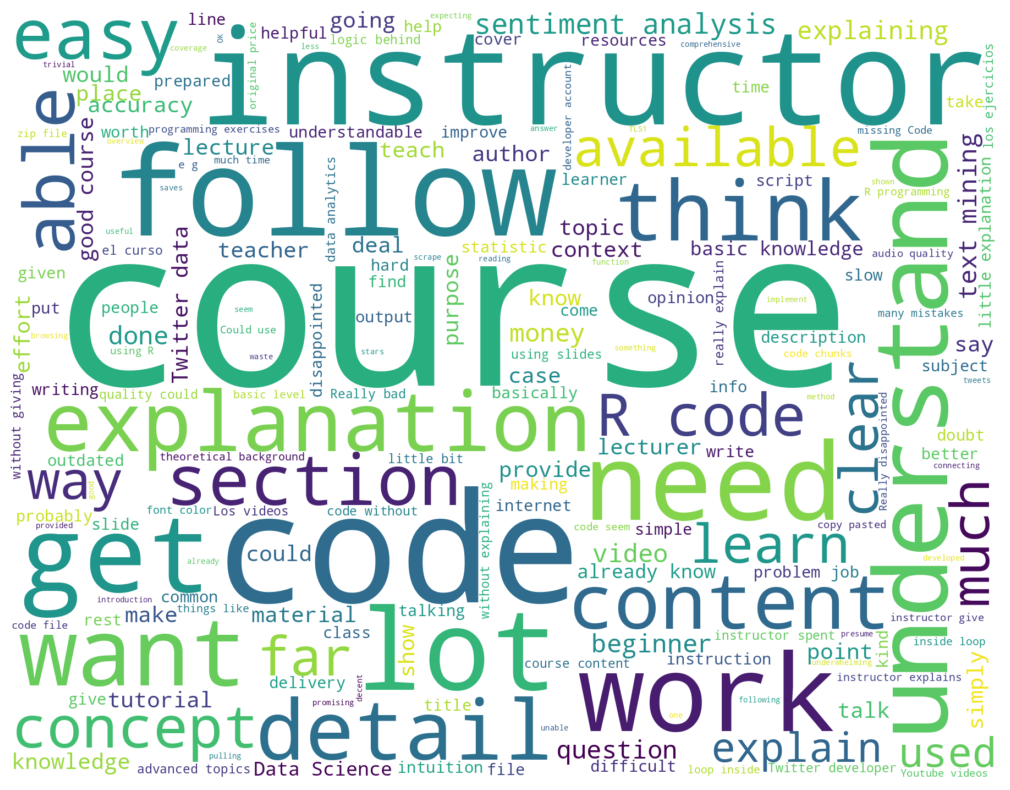

In [7]:
review_data.generate_word_cloud(
        " ".join(list(review_data.negative_review_data["comment"].values)),
        out_file_name="negative_words.png",
    )

# 2. Embeddings: State-of-the-art Summarization Technique
Let's now explore the idea of using embeddings to represent the reviews. These embeddings form a uniform representation framework for us to explore and find any hiddent patterns in our data. Let's start by using [Sentence Transformers](https://www.sbert.net/index.html). Here is a sample usage of Sentence Transformer library.

In [58]:
import numpy as np
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Our sentences we like to encode
sentences = ['hard one. the course topics looked very promising, but the content itself is underwhelming. If you want to get a current status overview of what text analysis can do this is probably a great course, if you want to learn more because you have some experience already you won\'t find what you need. ',
    'Too little explanation of runtime. Course not very comprehensive',
    'I\'d love to have more real examples ( code and use case )']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding (first 10 entries):", embedding[:10])
    print("")

Sentence: hard one. the course topics looked very promising, but the content itself is underwhelming. If you want to get a current status overview of what text analysis can do this is probably a great course, if you want to learn more because you have some experience already you won't find what you need. 
Embedding (first 10 entries): [ 2.0493606e-02 -3.4157418e-02 -8.3443359e-02  3.3444069e-02
  1.1346450e-03 -2.1219281e-03  8.3193932e-05  2.6567811e-02
 -3.0253589e-02  3.9128195e-02]

Sentence: Too little explanation of runtime. Course not very comprehensive
Embedding (first 10 entries): [-0.01394921 -0.04361966 -0.06415205  0.00888922  0.02199768 -0.11494827
 -0.02250055  0.08187525 -0.03332243 -0.04136921]

Sentence: I'd love to have more real examples ( code and use case )
Embedding (first 10 entries): [-0.08913244  0.01149292 -0.07467651 -0.04038038  0.00023219 -0.04838452
 -0.04044474  0.05936477 -0.02986165  0.01712122]



Let's use the above embedding model to create embeddings for all negative reviews.

In [60]:
def get_embedding(text):
    return model.encode([text])[0]

In [61]:
reviews = review_data.negative_review_data
# reviews = review_data.data
reviews

rating                                            comment
0       1.0  not good,total waste of money and time..not gi...
1       2.0  hard one. the course topics looked very promis...
2       2.0  Teorik olarak anlatım yapılıyor. Örnek sayısı ...
3       3.0  Too little explanation of runtime. Course not ...
4       3.0                                I think it is good.
..      ...                                                ...
206     1.0  The course barely had anything useful for me a...
207     2.5  He explains superficially how to do things lik...
208     3.0  The course works with already labeled data (ne...
209     3.0  Technically it is definitely good match and co...
210     1.0  Why the instructor can't speak normally? It's ...

[211 rows x 2 columns]

In [62]:
ebd = reviews["comment"].apply(lambda x: get_embedding(x))

In [63]:
type(ebd)

pandas.core.series.Series

In [64]:
reviews["embedding"] = ebd

In [65]:
reviews.columns

Index(['rating', 'comment', 'embedding'], dtype='object')

In [66]:
reviews

rating                                            comment  \
0       1.0  not good,total waste of money and time..not gi...   
1       2.0  hard one. the course topics looked very promis...   
2       2.0  Teorik olarak anlatım yapılıyor. Örnek sayısı ...   
3       3.0  Too little explanation of runtime. Course not ...   
4       3.0                                I think it is good.   
..      ...                                                ...   
206     1.0  The course barely had anything useful for me a...   
207     2.5  He explains superficially how to do things lik...   
208     3.0  The course works with already labeled data (ne...   
209     3.0  Technically it is definitely good match and co...   
210     1.0  Why the instructor can't speak normally? It's ...   

                                             embedding  
0    [-0.08207307, 0.015073199, -0.08981543, -0.024...  
1    [0.020493621, -0.034157444, -0.08344334, 0.033...  
2    [-0.046712384, 0.07314316, -0.026896778, 0.073...  
3    [-0.013949258, -0.04361968, -0.064152084, 0.00...  
4    [-0.08873629, -0.016336901, -0.025869586, -0.0...  
..                                                 ...  
206  [-0.06588183, -0.022402335, -0.04928034, 0.030...  
207  [0.037018087, 0.08400497, 0.038757693, -0.0167...  
208  [-0.0051099267, -0.007451576, -0.058662545, 0....  
209  [-0.045793682, -0.01074266, 0.001160842, -0.11...  
210  [0.055768922, -0.008329615, -0.01366639, -0.04...  

[211 rows x 3 columns]

In [67]:
reviews["embedding"] = reviews["embedding"].apply(np.array)

In [68]:
matrix = np.vstack(reviews.embedding.values)
matrix.shape

(211, 384)

In [69]:
matrix

array([[-0.08207307,  0.0150732 , -0.08981543, ...,  0.05169147,
        -0.03954478,  0.02677381],
       [ 0.02049362, -0.03415744, -0.08344334, ...,  0.00618258,
        -0.04855422,  0.03671758],
       [-0.04671238,  0.07314316, -0.02689678, ...,  0.05832343,
         0.01596812, -0.01401203],
       ...,
       [-0.00510993, -0.00745158, -0.05866254, ..., -0.01993825,
        -0.01939511, -0.02807482],
       [-0.04579368, -0.01074266,  0.00116084, ...,  0.07642443,
         0.0295623 , -0.02246086],
       [ 0.05576892, -0.00832961, -0.01366639, ...,  0.04220434,
        -0.08746397, -0.01710561]], dtype=float32)

In [70]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix)
labels = kmeans.labels_
reviews["Cluster"] = labels

reviews.groupby(["Cluster"]).mean()

/opt/miniconda3/envs/udemytextmining/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


rating
Cluster          
0        2.395833
1        2.055556
2        2.047619
3        1.842105
4        2.109756

Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

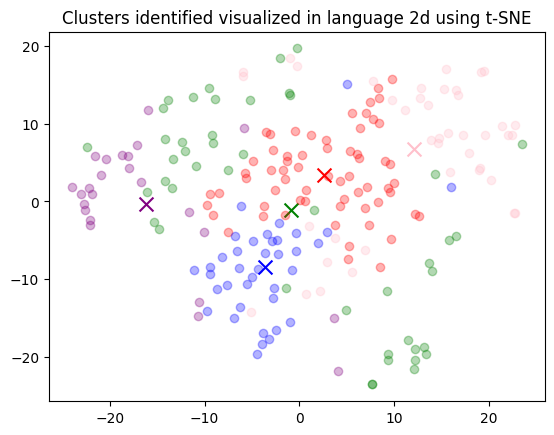

In [71]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(matrix)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue", "pink"]):
    xs = np.array(x)[reviews.Cluster == category]
    ys = np.array(y)[reviews.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [72]:
reviews.head()

rating                                            comment  \
0     1.0  not good,total waste of money and time..not gi...   
1     2.0  hard one. the course topics looked very promis...   
2     2.0  Teorik olarak anlatım yapılıyor. Örnek sayısı ...   
3     3.0  Too little explanation of runtime. Course not ...   
4     3.0                                I think it is good.   

                                           embedding  Cluster  
0  [-0.08207307, 0.015073199, -0.08981543, -0.024...        3  
1  [0.020493621, -0.034157444, -0.08344334, 0.033...        4  
2  [-0.046712384, 0.07314316, -0.026896778, 0.073...        1  
3  [-0.013949258, -0.04361968, -0.064152084, 0.00...        3  
4  [-0.08873629, -0.016336901, -0.025869586, -0.0...        0

========== Wordcloud for cluster: 0 ===================


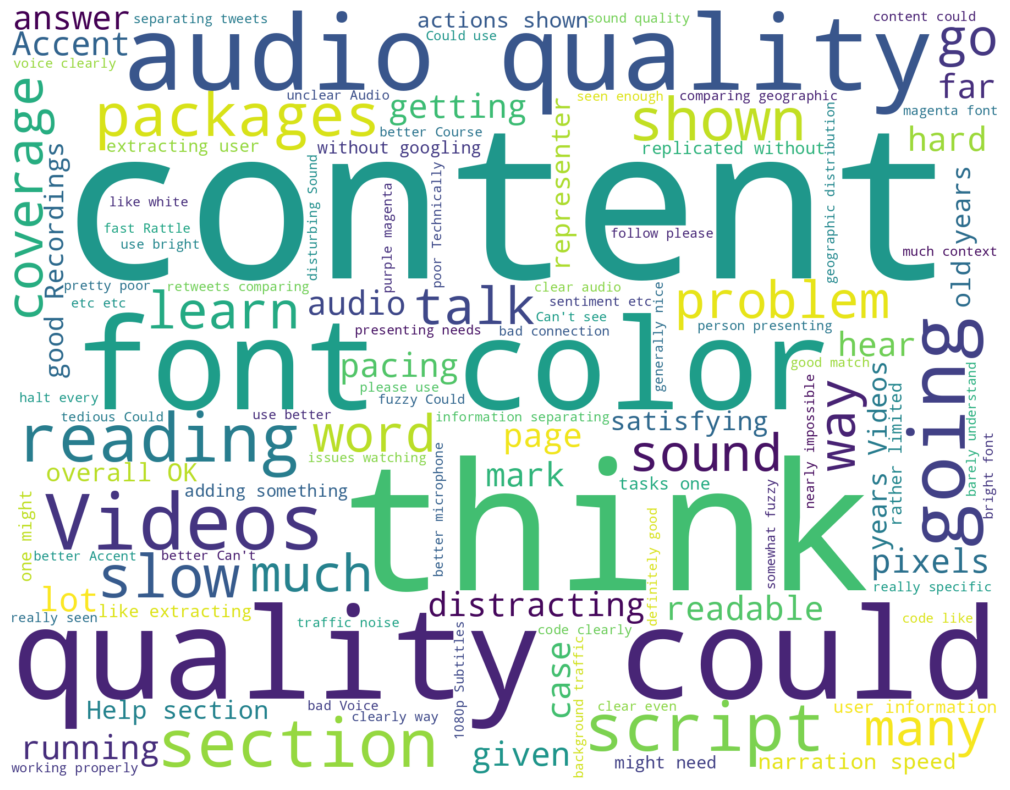




========== Wordcloud for cluster: 1 ===================


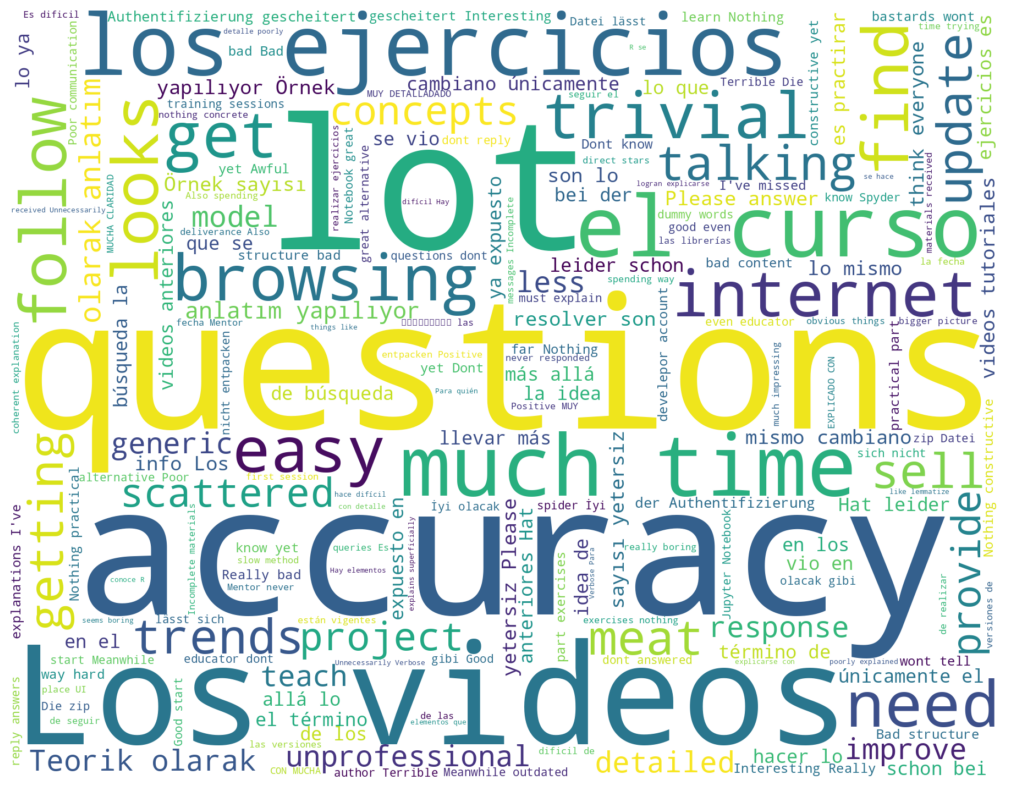




========== Wordcloud for cluster: 2 ===================


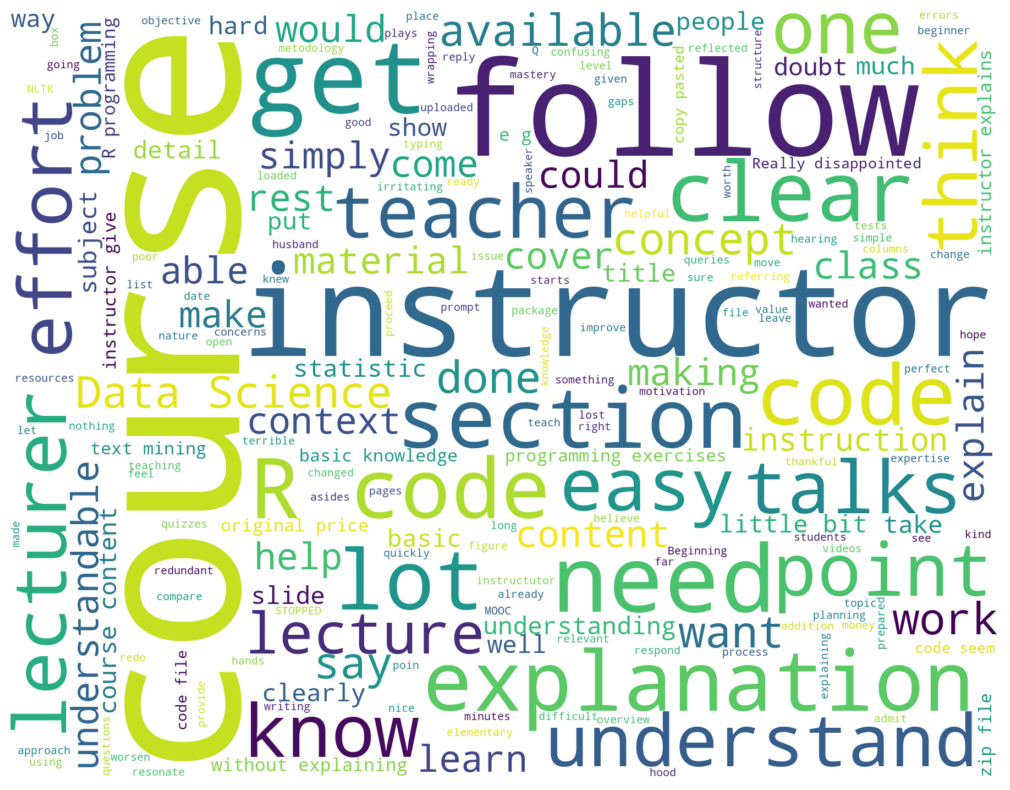




========== Wordcloud for cluster: 3 ===================


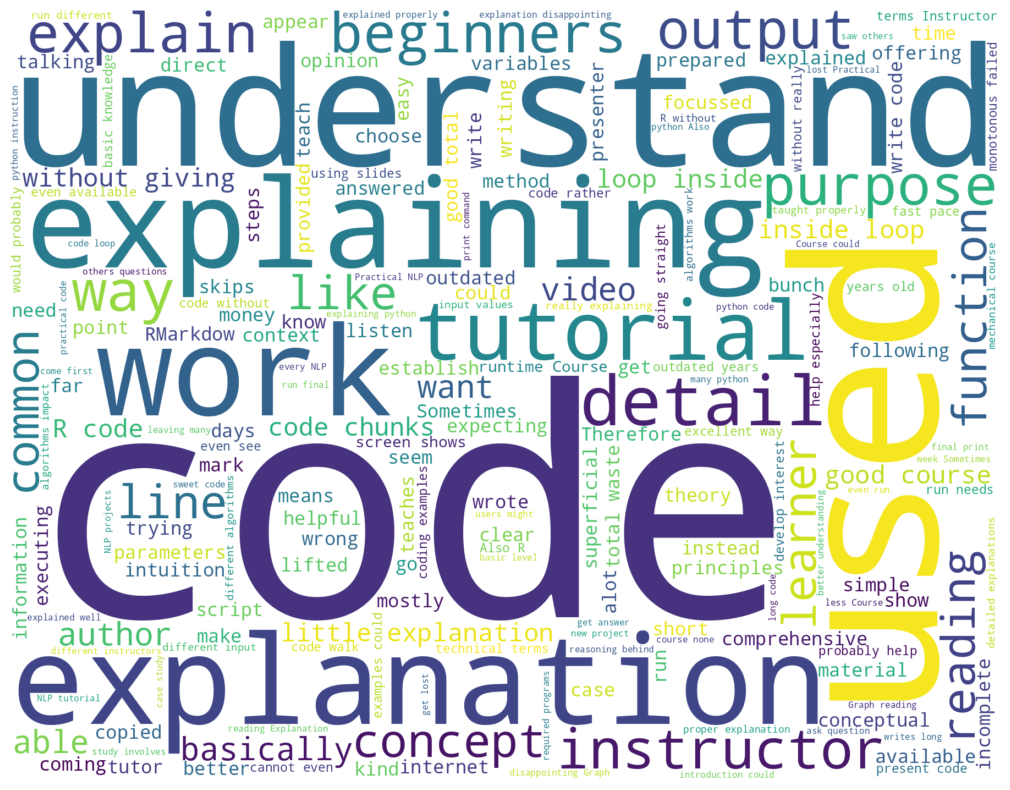




========== Wordcloud for cluster: 4 ===================


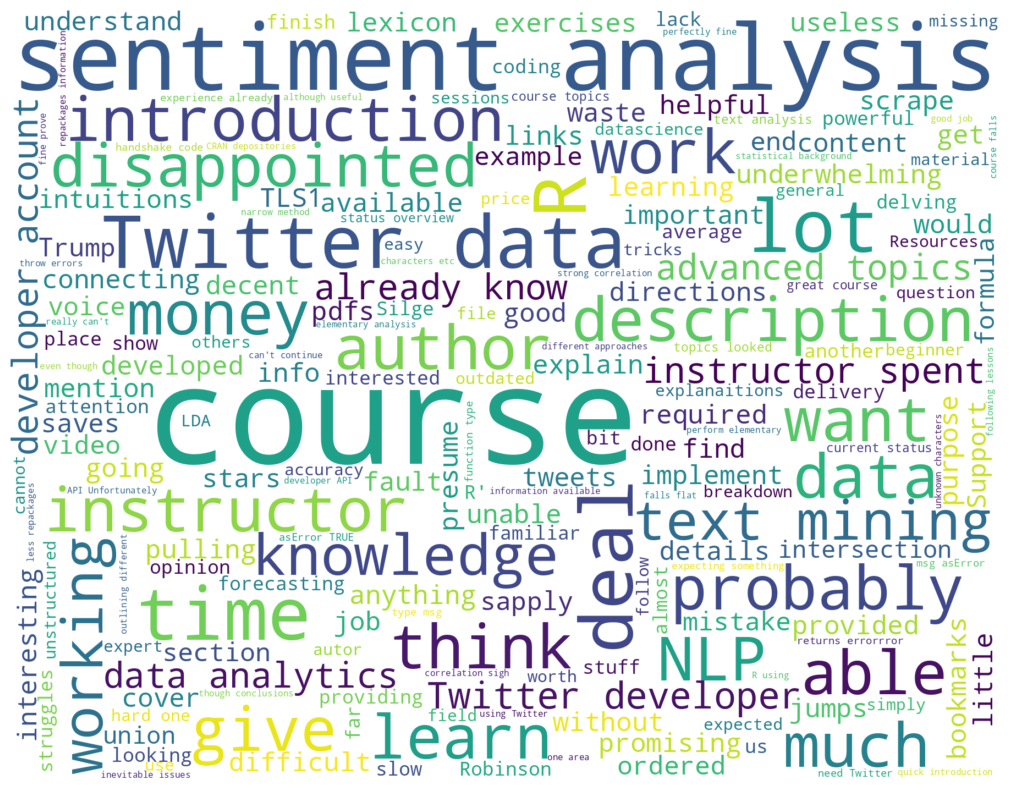

In [73]:
for cluster_id, data in reviews.groupby("Cluster"):
    print(f"========== Wordcloud for cluster: {cluster_id} ===================")
    review_data.generate_word_cloud(
        " ".join(list(data["comment"].values)),
        out_file_name=f"cluster_{cluster_id}_negative_words.png",
    )
    print("\n\n")

# Observations
Here are the clusters and their observations looking at the wordcloud. I looked for solme patterns and find any theme that may represent a cluster and also some keywords that were mentioned in each of those clusters. 
* Cluster 0: Theme seems to be about quality of the course content
    * font and font color choices
    * bad connection
    * better microphone
    * fast rattle
* Cluster 1: Theme seems to be of questions getting not answered by instructors
    * don't reply
    * please answer
* Cluster 2: Theme seems to be around the explanation of the instructor
    * little bit
    * zip file
* Cluster 3: Theme seems to be revolving around code, it's explanation & working
    * way outdated
    * case study
    * without giving
    * reading explanation
* Cluster 4: Seems like a mix of multiple themes
    * throw errors
    
As you can see, these clusters provide a deeper multi-facated view into the pain-points of students. I have tried to be mindful of these issues when I created this course. But, this is my first time creating such a course and I would truly appreciate your feedback to improve this course!

# References
1. K-Means clustering code and tSNE code borrowed from: https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb